In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split

Using original datasets (generated by Madeline, downloaded from shared google drive)

In [2]:
X_train = pd.read_csv("datasets/training_set_all_features_no_onehot_scaling.csv")
y_train = pd.read_csv("datasets/training_set_labels.csv")
X_test = pd.read_csv("datasets/test_set_all_features_no_onehot_scaling.csv")
y_test = pd.read_csv("datasets/test_set_labels.csv")

In [3]:
# Reshape y to a 1D array
y_train = np.ravel(y_train)
y_test = np.ravel(y_test)

In [4]:
# Create models
decision_tree_model = DecisionTreeClassifier(random_state=42)
random_forest_model = RandomForestClassifier(random_state=42)
neural_network_model = MLPClassifier(random_state=42)

# Train models
decision_tree_model.fit(X_train, y_train)
random_forest_model.fit(X_train, y_train)
neural_network_model.fit(X_train, y_train)

# Function to calculate sensitivity and specificity
def calculate_metrics(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    specificity = tn / (tn + fp)
    sensitivity = tp / (tp + fn)
    return sensitivity, specificity

# Function to generate a dataframe with metrics
def generate_metrics_df(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    sensitivity, specificity = calculate_metrics(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)
    
    return pd.DataFrame({
        'Model': [str(model).split('(')[0]],
        'Accuracy': [accuracy],
        'Sensitivity': [sensitivity],
        'Specificity': [specificity],
        'AUC': [auc]
    })

# Generate dataframes for each model
decision_tree_df = generate_metrics_df(decision_tree_model, X_test, y_test)
random_forest_df = generate_metrics_df(random_forest_model, X_test, y_test)
neural_network_df = generate_metrics_df(neural_network_model, X_test, y_test)

# Combine dataframes
result_df = pd.concat([decision_tree_df, random_forest_df, neural_network_df], ignore_index=True)

# Print the result dataframe
result_df

,Model,Accuracy,Sensitivity,Specificity,AUC
0,DecisionTreeClassifier,0.495513,0.486788,0.504339,0.495563
1,RandomForestClassifier,0.503106,0.458476,0.548247,0.503362
2,MLPClassifier,0.501855,0.701356,0.300069,0.500712


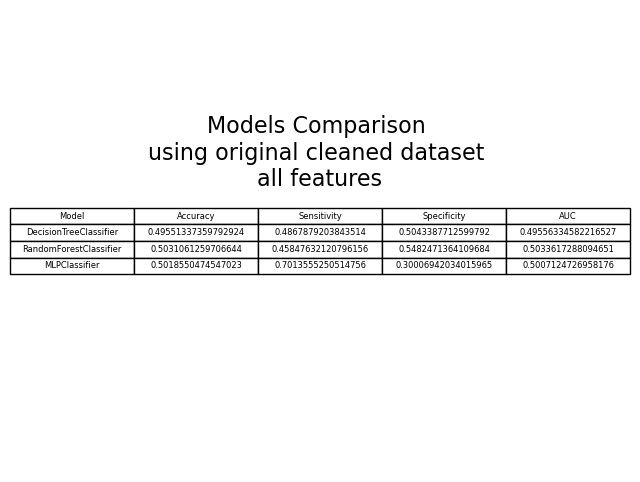

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Plot the DataFrame as a table
fig, ax = plt.subplots(figsize=(8, 6)) 
ax.axis('tight')
ax.axis('off')
ax.table(cellText=result_df.values, colLabels=result_df.columns, cellLoc = 'center', loc='center')

# Add a title to the plot
plt.title('Models Comparison \nusing original cleaned dataset \nall features', fontsize=16, y=0.6)  # Adjust the y value as needed

# Save the plot as an image (you can use different formats like PNG, JPG, etc.)
plt.savefig('original_cleaned_dataset_all_features.png', bbox_inches='tight')
plt.show()